### aim: 

### date: 

In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [15]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

    '': {
        'name': '',
        'color':'',
        'linestyle' : '',
        'linewidth' : '',
    },
    

## define m3dict

In [46]:
tlw = 0.6; lw2 = 2.2

m3dict = {
    '1A': {'name': '','color':'darkgray','linestyle' : '-','linewidth' : tlw},
    '1AM2': {'name': '','color':'darkgray','linestyle' : ':','linewidth' : tlw},
    '1AM3': {'name': '','color':'darkgray','linestyle' : '--','linewidth' : tlw},
    '1AEM': {'name': 'SSP 1-2.6 \n HIST. OZONE','color':'darkgray','linestyle' : '-','linewidth' : lw2,},

    '1B': {'name': '','color':'black','linestyle' : '-','linewidth' : tlw},
    '1BM2': {'name': '','color':'black','linestyle' : ':','linewidth' : tlw},
    '1BM3': {'name': '','color':'black','linestyle' : '--','linewidth' : tlw},
    '1BEM': {'name': 'SSP 3-7.0 \n HIST. OZONE','color':'black','linestyle' : '-','linewidth' : lw2,},
    
    '2A': {'name': '','color':'deepskyblue','linestyle' : '-','linewidth' : tlw},
    '2AM2': {'name': '','color':'deepskyblue','linestyle' : ':','linewidth' : tlw},
    '2AM3': {'name': '','color':'deepskyblue','linestyle' : '--','linewidth' : tlw},
    '2AEM': {'name': 'SSP 1-2.6 \n OZONE 1950','color':'deepskyblue','linestyle' : '-','linewidth' : lw2,},

    '2B': {'name': '','color':'blue','linestyle' : '-','linewidth' : tlw},
    '2BM2': {'name': '','color':'blue','linestyle' : ':','linewidth' : tlw},
    '2BM3': {'name': '','color':'blue','linestyle' : '--','linewidth' : tlw},
    '2BEM': {'name': 'SSP 3-7.0 \n OZONE 1950','color':'blue','linestyle' : '-','linewidth' : lw2,},    
}

## make ensemble means (will have to be redone when we have 3)

original is done in extract_ts_3M

In [44]:
ex = False 

def make_ensemble_avg(e1,e2, e3, tlat = '40-60'):
    
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    e1d = xr.open_dataset(f'{tdir}/scen{e1}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    e2d = xr.open_dataset(f'{tdir}/scen{e2}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    e3d = xr.open_dataset(f'{tdir}/scen{e3}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')

    # Compute the average of the 'wspd10m' variable across the datasets
    wspd10m_avg = (e1d['wspd10m'] + e2d['wspd10m'] + e3d['wspd10m']) / 3

    # Create a new dataset with the averaged variable
    d4 = xr.Dataset({'wspd10m': wspd10m_avg})

    # Optionally, copy attributes from one of the datasets to the new one
    d4['wspd10m'].attrs = e1d['wspd10m'].attrs
    d4.attrs = {"made in": 'windEval/plottingCode/Fig-attribution3M.ipynb'}
    
    d4.to_netcdf(f'{tdir}/scen{e1}EM_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    print(f'saved scen{e1}EM_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    
    return d4

if ex:
    d4 = make_ensemble_avg('1A','1AM2','1AM3')
    d4 = make_ensemble_avg('1B','1BM2','1BM3')
    d4 = make_ensemble_avg('2A','2AM2','2AM3')
    d4 = make_ensemble_avg('2B','2BM2','2BM3')
# # Save or further process the new dataset
# print(d4)

## font set!

In [45]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams
plt.rcParams['text.usetex'] = False
plt.rc('font', **font)

fs = 12
# Set global font size
rcParams.update({
    'font.size': fs,            # Base font size
    'axes.titlesize': fs,       # Title size
    'axes.labelsize': fs,       # X/Y label size
    'xtick.labelsize': fs,      # X-axis tick label
    'ytick.labelsize': fs,      # Y-axis tick label
    'legend.fontsize': fs,      # Legend text
})


# Your Gill Sans font file
gill_sans_path = "/gpfs/home/mep22dku/scratch/FONTS/gill-sans/GillSansMedium.otf"

# Register the font
gill_font = font_manager.FontProperties(fname=gill_sans_path)
font_manager.fontManager.addfont(gill_sans_path)

# Get internal name (important for mathtext settings)
gill_font_name = font_manager.FontProperties(fname=gill_sans_path).get_name()

# Set mathtext to use your font
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = gill_font_name
rcParams['mathtext.it'] = gill_font_name
rcParams['mathtext.bf'] = gill_font_name




# Specify the paths to the gill Sans font files
gill_sans = "/gpfs/home/mep22dku/scratch/FONTS/gill-sans/GillSansMedium.otf"
# Create FontProperties object
gill_font = font_manager.FontProperties(fname=gill_sans)

# Sample plot
test = False; 
if test:
    fig, ax = plt.subplots()
    fs = 14

    ax.plot([0, 1], [0, 1])

    # Apply font to specific labels
    ax.set_title("Jouda", fontproperties=gill_font)
    ax.set_xlabel("X-axis", fontproperties=gill_font)
    ax.set_ylabel("Y-axis", fontproperties=gill_font)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(gill_font)

    plt.show()

## FIGURE 1950-2100

1A
1B
2A
2B
1AM2
1BM2
2AM2
2BM2
1AM3
1BM3
2AM3
2BM3
1AEM
2.2
2AEM
2.2
1BEM
2.2
2BEM
2.2


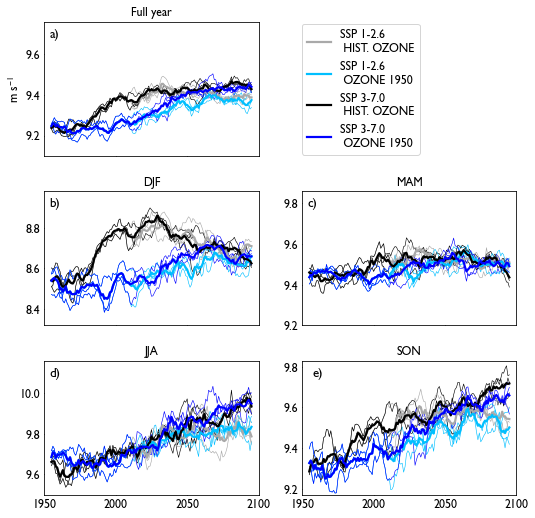

In [52]:
scens = ['1A','1B','2A','2B','1AM2','1BM2','2AM2','2BM2',\
         '1AM3','1BM3','2AM3','2BM3','1AEM','2AEM','1BEM','2BEM']
stl = ['1AEM','2AEM','1BEM','2BEM']


fact = 1
fact = 0.8
fig, axs = plt.subplots(3,2, figsize=(9.5*fact, 9.2*fact), sharex=False, sharey=False)
axs = axs.ravel()


ts = ['DJF','MAM','JJA','SON']

for s in scens:
    print(s)
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    td = xr.open_dataset(f'{tdir}/scen{s}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
    g = td.groupby('time_counter.year').mean()
    
    tv_rol = g.rolling(year=10, center=True).mean()
    
    if s in stl:
        print(m3dict[s]['linewidth'])
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'], label = m3dict[s]['name'])    
    else:
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'],)

    
    
    for i in range(0,4):
        g = td.sel(time_counter=(td['time_counter.season'] == ts[i])).groupby('time_counter.year').mean()
        tv_rol = g.rolling(year=10, center=True).mean()
        axs[i+2].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['linewidth'],)
    
    axs[1].axis('off')
    
tmin = [9.1,8.32,9.2,9.5,9.17]
tits = ['Full year','DJF','MAM','JJA','SON']
ofs = 0.66
ind = 0
for i in range(0,6):

    if i != 1:
        axs[i].set_xlim([1950,2100])
        axs[i].set_xticks(np.arange(1950,2150,50))
        axs[i].set_xticklabels([])
        axs[i].set_ylim([tmin[ind],tmin[ind]+ofs])
        axs[i].tick_params(axis='x', length=0.5)
        axs[i].tick_params(axis='y', length=0.5)
    
        axs[i].set_title(tits[ind], fontproperties=gill_font)
        ind = ind+1
        
for ax in axs:
    for label in ax.get_yticklabels():
        label.set_fontproperties(gill_font)
        
        
axs[0].set_ylabel('m s$^{-1}$', fontproperties=gill_font)
axs[4].set_xticklabels(np.arange(1950,2150,50), fontproperties=gill_font)
axs[5].set_xticklabels(np.arange(1950,2150,50), fontproperties=gill_font)
        
handles, labels = axs[0].get_legend_handles_labels()  # Collect handles and labels from a subplot

fs = 13
axs[0].text(0.025, 0.95, 'a)', transform=axs[0].transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
axs[2].text(0.025, 0.95, 'b)', transform=axs[2].transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
axs[3].text(0.025, 0.95, 'c)', transform=axs[3].transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
axs[4].text(0.025, 0.95, 'd)', transform=axs[4].transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
axs[5].text(0.05, 0.95, 'e)', transform=axs[5].transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)



fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.67, 0.82), prop=gill_font)

plt.tight_layout()

fig.savefig('./plts-gill/Fig-TS3M.jpg', dpi = 300, bbox_inches='tight')


## get trends and store in datafram

In [19]:
import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


In [50]:
ex = True

def get_ukesm3m_JTE(y1,y2):
    print(f'{y1}-{y2}')
    data = np.zeros([5,4])
    data2 = np.zeros([5,4])
    sig = np.zeros([5,4])

#     ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM',\
#            '2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
    
    ems = ['2AEM','1AEM','2BEM','1BEM']
    
    
    emf = ['2AM3','1AM3','2BM3','1BM3',]

    for m in range(0,len(ems)):

        tm = (ems[m])
        print(tm)

        if tm in emf:
            pass
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values

            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

    df = pd.DataFrame(data, columns=ems,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(data2, columns=ems,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
    df.to_csv(f'./plts/UKESMEM-trend-{y1}-{y2}.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
    df2.to_csv(f'./plts/UKESMEM-trendsig-{y1}-{y2}.csv')
    print(f'./plts/UKESMEM-trend-{y1}-{y2}.csv')
        
def get_ukesm3mo3_JTE(y1,y2, verbose = False):
    print(f'{y1}-{y2}')
    data = np.zeros([5,2])
    data2 = np.zeros([5,2])

    ems = ['1A','1AM2','1AM3','1AEM','1B','1BM2','1BM3','1BEM']
    ems2 = ['2A','2AM2','2AM3','2AEM','2B','2BM2','2BM3','2BEM']
    
    ems = ['1AEM','1BEM']
    ems2 = ['2AEM','2BEM']
    
    emf = ['1AM3','1BM3']

    for m in range(0,len(ems)):

        tm = (ems[m])
        tm2 = (ems2[m])
        print(f'{tm}-{tm2}')

        if tm in emf:
            pass
        
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g1 = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g2 = td2.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            g = g1-g2
            if verbose:
                print(g)
            
            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            if verbose:
                print(f'{lin_slope} p{lin_p}')
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g1 = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g2 = td2.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values                 
                g = g1-g2
                
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

    df = pd.DataFrame(data, columns=ems,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(data2, columns=ems,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
    df.to_csv(f'./plts/UKESMEM-O3trend-{y1}-{y2}.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
    df2.to_csv(f'./plts/UKESMEM-O3trendsig-{y1}-{y2}.csv')
    print(f'./plts/UKESMEM-O3trend-{y1}-{y2}.csv')
    

In [51]:
ex = True

if ex:

    get_ukesm3mo3_JTE(1950,1999)
    get_ukesm3mo3_JTE(2000,2049)
    get_ukesm3mo3_JTE(2050,2099)

    get_ukesm3m_JTE(1950,1999)
    get_ukesm3m_JTE(2000,2049)
    get_ukesm3m_JTE(2050,2099)    

1950-1999
1AEM-2AEM
1BEM-2BEM
./plts/UKESMEM-O3trend-1950-1999.csv
2000-2049
1AEM-2AEM
1BEM-2BEM
./plts/UKESMEM-O3trend-2000-2049.csv
2050-2099
1AEM-2AEM
1BEM-2BEM
./plts/UKESMEM-O3trend-2050-2099.csv
1950-1999
2AEM
1AEM
2BEM
1BEM
./plts/UKESMEM-trend-1950-1999.csv
2000-2049
2AEM
1AEM
2BEM
1BEM
./plts/UKESMEM-trend-2000-2049.csv
2050-2099
2AEM
1AEM
2BEM
1BEM
./plts/UKESMEM-trend-2050-2099.csv


## old code - extract every trend for every EM -- overkill. 

In [22]:
ex = False

def get_ukesm3m(y1,y2):
    print(f'{y1}-{y2}')
    data = np.zeros([5,16])
    data2 = np.zeros([5,16])
    sig = np.zeros([5,16])

    ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM',\
           '2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']

    emf = ['2AM3','1AM3','2BM3','1BM3',]

    for m in range(0,len(ems)):

        tm = (ems[m])
        print(tm)

        if tm in emf:
            pass
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values

            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M-trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M-trendsig-{y1}-{y2}.csv')

        
def get_ukesm3mo3(y1,y2, verbose = False):
    print(f'{y1}-{y2}')
    data = np.zeros([5,8])
    data2 = np.zeros([5,8])

    ems = ['1A','1AM2','1AM3','1AEM','1B','1BM2','1BM3','1BEM']
    ems2 = ['2A','2AM2','2AM3','2AEM','2B','2BM2','2BM3','2BEM']
    emf = ['1AM3','1BM3']

    for m in range(0,len(ems)):

        tm = (ems[m])
        tm2 = (ems2[m])
        print(f'{tm}-{tm2}')

        if tm in emf:
            pass
        
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g1 = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g2 = td2.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            g = g1-g2
            if verbose:
                print(g)
            
            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            if verbose:
                print(f'{lin_slope} p{lin_p}')
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g1 = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g2 = td2.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values                 
                g = g1-g2
                
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M-O3trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M-O3trendsig-{y1}-{y2}.csv')
    
    

## get out the ozone attribution and main trends into df

In [23]:
ex = False


if ex:
    get_ukesm3mo3(1980,2019)
    get_ukesm3mo3(2020,2059)
    get_ukesm3mo3(2060,2099)

    get_ukesm3m(1980,2019)
    get_ukesm3m(2020,2059)
    get_ukesm3m(2060,2099)    
    
    get_ukesm3mo3(1950,1999)
    get_ukesm3mo3(2000,2049)
    get_ukesm3mo3(2050,2099)

    get_ukesm3m(1950,1999)
    get_ukesm3m(2000,2049)
    get_ukesm3m(2050,2099)    

## horrible overview dot plot

In [24]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1950-1999.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1950-1999.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2000-2049.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2000-2049.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2050-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2050-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
df = T3m_1950_2000
dfs = T3m_1950_2000sig

tplc = np.arange(1,6)

    
seas = ['full year','DJF','MAM','JJA','SON']
ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
ems = ['2AEM','1AEM','2BEM','1BEM',] 

#ems = ['2A','2AM2']
emf = ['2AM3','1AM3','2BM3','1BM3',]  
eme = ['2AEM','1AEM','2BEM','1BEM',]  

fig, axs = plt.subplots(1,3, figsize=(14*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for d in range(0,3):
    
    df = dfar[d]
    dfs = dfsar[d]
    
    for i in range(0,len(ems)):

        em = ems[i] 

        for f in range(0,5):

            ms = 6

            ts = seas[f]
            if em in emf:
                pass
            else:

                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                sig = dfs.loc[ts, em]
                #print(f'{em} {tcol} {ts} {value}, {sig}')
                if em in eme: 
                    ms = ms + 3
                    axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol, \
                             label = m3dict[em]['name'], markersize = ms, linestyle = '',\
                            markeredgecolor = 'w')
                else: 

                    axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol,\
                             markersize = ms, linestyle = '', markeredgecolor = 'w')
                if sig != 0:
                     axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol,\
                             markersize = ms, linestyle = '', markeredgewidth = 2,\
                             markeredgecolor = 'r')               




NameError: name 'T3m_1950_2000' is not defined

In [ ]:

def get_seasplot(dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07]):
    twidth = 0.2
    fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d].bar(2+(twidth/2), vtot, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 

                axs[d].bar(2+(twidth*m), vtot, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d].set_xticks([1.1,2.1])
        axs[d].set_xticklabels(['GHG only', 'GHG + O$_3$'])
        axs[d].axhline(y = 0)
        axs[d].set_ylim(ylims)
        axs[d].tick_params(axis='x', length=0.5)
        axs[d].tick_params(axis='y', length=0.5)
        axs[0].set_ylabel('m $^{-1}$')
        axs[d].set_title(tits[d])

    fig.suptitle(ts, y = 1.05)
    fig.savefig(f'./plts/UKESM3M/{tit}_{ts}.jpg')
    


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1950-1999.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1950-1999.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2000-2049.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2000-2049.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2050-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2050-2099.csv', index_col=0)
    
dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
get_seasplot(dfar,dfsar,'1950-2100','full year')
get_seasplot(dfar,dfsar,'1950-2100','DJF')
get_seasplot(dfar,dfsar,'1950-2100','MAM')
get_seasplot(dfar,dfsar,'1950-2100','JJA')
get_seasplot(dfar,dfsar,'1950-2100','SON')

In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
tylims = [-0.055,0.055]
get_seasplot(dfar,dfsar,'1980-2100','full year',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','DJF',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','MAM',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','JJA',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','SON',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)

In [ ]:

def get_seasplot_diff(dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07]):
    twidth = 0.2
    fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d].bar(2+(twidth/2), vtot-value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 

                axs[d].bar(2+(twidth*m), vtot-value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d].set_xticks([1.1,2.1])
        axs[d].set_xticklabels(['GHG only', 'O$_3$ only'])
        axs[d].axhline(y = 0)
        axs[d].set_ylim(ylims)
        axs[d].tick_params(axis='x', length=0.5)
        axs[d].tick_params(axis='y', length=0.5)
        axs[0].set_ylabel('m $^{-1}$')
        axs[d].set_title(tits[d])

    fig.suptitle(ts, y = 1.05)
    fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')
    


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
tylims = [-0.095,0.055]
get_seasplot_diff(dfar,dfsar,'1980-2100','full year',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','DJF',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','MAM',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','JJA',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','SON',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)

In [ ]:

def get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0):
    axs = axs.ravel()
    twidth = 0.2
    #fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d+os].bar(2+(twidth/2), vtot-value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if (vtots != 0): tedge = 2, 

                axs[d+os].bar(2+(twidth*m), vtot-value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d+os].set_xticks([1.1,2.1])
        axs[d+os].set_xticklabels(['GHG only', 'O$_3$ only'])
        axs[d+os].axhline(y = 0)
        axs[d+os].set_ylim(ylims)
        axs[d+os].tick_params(axis='x', length=0.5)
        axs[d+os].tick_params(axis='y', length=0.5)
        if d == 0: axs[d+os].set_ylabel(f'{ts} \n m/s /dec')
        if os == 0:
            axs[d].set_title(tits[d])

    #fig.suptitle(ts, y = 1.05)
    #fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')


In [ ]:

def get_seasplot_1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0):
    axs = axs.ravel()
    twidth = 0.2
    #fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d+os].bar(2+(twidth/2), vtot, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if (vtots != 0): tedge = 2, 

                axs[d+os].bar(2+(twidth*m), vtot, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d+os].set_xticks([1.1,2.1])
        axs[d+os].set_xticklabels(['GHG only', 'O$_3$ +GHG'])
        axs[d+os].axhline(y = 0)
        #axs[d+os].set_ylim(ylims)
        axs[d+os].tick_params(axis='x', length=0.5)
        axs[d+os].tick_params(axis='y', length=0.5)
        if d == 0: axs[d+os].set_ylabel(f'{ts} \n m/s /dec')
        if os == 0:
            axs[d].set_title(tits[d])

    #fig.suptitle(ts, y = 1.05)
    #fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]

fig, axs = plt.subplots(5,3, figsize=(14*fact, 2.5*5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

# get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0)

get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','full year', tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','DJF', ylims = tylims, os = 6)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','MAM', ylims = tylims, os = 9)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','JJA', ylims = tylims, os = 12)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','SON', ylims = tylims, os = 3)

In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]

fig, axs = plt.subplots(5,3, figsize=(14*fact, 2.5*5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

# get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0)

get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','full year', tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','DJF', ylims = tylims, os = 6)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','MAM', ylims = tylims, os = 9)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','JJA', ylims = tylims, os = 12)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','SON', ylims = tylims, os = 3)

In [ ]:
axs[0][0].plot(1,1,'r*')

In [ ]:
np.shape(axs)

In [ ]:
axs = axs.ravel()
np.shape(axs)